# First Research Hypothesis

## 1 Installing packages and setting up environment

In [ ]:
#Setting up Spark and all relevant dictionaries: 
!ls

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt

sample_data
--2023-05-13 14:40:29--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  28.6MB/s    in 11s     

2023-05-13 14:40:40 (26.8 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292368
drwxr-xr-x  1 root root      4096 May 13 14:40 .
drwxr-xr-x  1 root root      4096 May 13 14:36 ..
drwxr-xr-x  1 root root      4096 May 11 16:35 sample_data
drwxr-xr-x  4 root root      4096 May 11 16:34 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.2-bin-hadoop3


In [ ]:
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Downloading and Unzipping the TFL open data for the year 2014 London bike hire
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-13 14:41:10--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.100.13, 104.16.101.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.100.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M  41.9MB/s    in 5.8s    

2023-05-13 14:41:17 (37.2 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# Spark is started. 2 cores used:
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# Importing pyspark SQL for queries: 
from pyspark.sql import *
from pyspark.sql.functions import *

# Spark Session is started: 
# "SparkSession" and "sc" are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("ride").getOrCreate()

## First Research Hypothesis: “In 2014, people ride for longer in Autumn than in Spring”

## 2 LOADING DATASET

The hypothesis demands the ride duration between the autumn and spring season. For defining the autumn season dates and spring season dates the information from the 'metoffice.gov.uk' is used. 

### 2.1 AUTUMN DATA PREPERATION

The autumn dates are as below:
<br>23 September'14 - 21 December'14
<br>The csv files from the dataset which needs to be used:
<br>10a. 14Sep14-27Sep14.csv
<br>10b. 28Sep14-11Oct14.csv
<br>11a. 12Oct14-08Nov14.csv
<br>11b. 12Oct14-08Nov14.csv
<br>12a. 09Nov14-06Dec14.csv
<br>12b. 09Nov14-06Dec14.csv
<br>13a. 07Dec14-21Dec14.csv

In [ ]:
autumn = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./10a.*csv', './10b.*csv', './11a.*csv', './11b.*csv', './12a.*csv', './12b.*csv', './13a.*csv' ]))

In [ ]:
autumn.count()

3114128

The autumn dataframe created from the csv file consist of 3114128 records.

In [ ]:
autumn.describe()

DataFrame[summary: string, Rental Id: string, Duration: string, Bike Id: string, End Date: string, EndStation Id: string, EndStation Name: string, Start Date: string, StartStation Id: string, StartStation Name: string, _c9: string, _c10: string, _c11: string]

In [ ]:
autumn.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [ ]:
autumn.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|null|null|null|
| 37875861|    1080|   3283|28/09/2014 00:18|          645|Great Suffolk Str...|28/09/2014 00:00|             14|Belgrove Street ,...|null|null|null|
| 37875857|    2820|  11369|28/09/2014 00:47|          727|Chesilton Road, F...|28/09/2014 00:00|            321|Bermondsey Street...|null|null|null|
| 37875849|    1620|  11362|28/09/2014 00:27|          719|Victoria Park Roa...|28/09/2014 00:00|   

The start Date column is in string datatype which needs to be converted to timestamp for facilitating filter over the start Date column.

In [ ]:
autumn1 = autumn.withColumn("start Date", to_timestamp("start Date", "dd/MM/yyyy HH:mm"))

In [ ]:
#Checking if the datatype has changed
autumn1.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- start Date: timestamp (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [ ]:
autumn1.show(1)

+---------+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|         start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|2014-09-28 00:00:00|            443|Philpot Street, W...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+-------------------+---------------+--------------------+----+----+----+
only showing top 1 row



The csv files consists of data from 14 September'14 to 21 December'14. But the required autumn data extends from 23 September'14 to 21 december'14. Hence the data from 23 September'14 to 21 december'14 needs to be filtered to create the final dataset with only required dates.

In [ ]:
autumn2 = autumn1.filter(autumn1['Start Date'] >= "2014-09-23 00:00:00")

In [ ]:
autumn2.agg({"start Date": "min"}).show()
autumn2.agg({"start Date": "max"}).show()

+-------------------+
|    min(start Date)|
+-------------------+
|2014-09-23 00:00:00|
+-------------------+

+-------------------+
|    max(start Date)|
+-------------------+
|2014-12-21 23:59:00|
+-------------------+



Lets create a final dataset with only required columns for proving the hypothesis. Here only Bike Id, Duration and start Date are the required columns.

In [ ]:
autumn_final = autumn2.select( "Bike Id", "Duration", "start Date")

In [ ]:
autumn_final.show(5)

+-------+--------+-------------------+
|Bike Id|Duration|         start Date|
+-------+--------+-------------------+
|   3229|     120|2014-09-28 00:00:00|
|   3283|    1080|2014-09-28 00:00:00|
|  11369|    2820|2014-09-28 00:00:00|
|  11362|    1620|2014-09-28 00:00:00|
|   7711|     480|2014-09-28 00:00:00|
+-------+--------+-------------------+
only showing top 5 rows



### SPRING DATA PREPERATION

The spring dates obtained from the metoffice.gov.uk are 20 March'14 - 21 June'14. Hence the files which needs to be imported are:
<br>3. 02 Mar - 31 Mar
<br>4. 01 April - 26 April
<br>5. 27 April - 24 May
<br>6. 25 May - 21 June

In [ ]:
spring = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./3.*csv', './4.*csv', './5.*csv', './6.*csv' ]))

In [ ]:
spring.count()

3146046

The spring dataframe created from the csv files consists of 3146046 records.

In [ ]:
spring.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [ ]:
spring.show(1)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 33253206|    1140|  11439|27/05/2014 00:59|          695|Islington Green, ...|27/05/2014 00:40|             81|Great Titchfield ...|null|null|null|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
only showing top 1 row



The the start Date column is in string datatype which needs to be converted to timestamp for facilitating filter over the start Date column.

In [ ]:
spring1 = spring.withColumn("start Date", to_timestamp("start Date", "dd/MM/yyyy HH:mm"))

In [ ]:
spring1.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- start Date: timestamp (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



The csv files consists of data from 2 March'14 to 21 June'14. But the required autumn data extends from 20 March'14 to 21 June'14. Hence the data from 20 March'14 to 21 June'14 needs to be filtered to create the final dataset with only required dates.

In [ ]:
spring2 = spring1.filter(spring1['Start Date'] >= "2014-03-21 00:00:00")

In [ ]:
spring2.agg({"start Date": "min"}).show()
spring2.agg({"start Date": "max"}).show()

+-------------------+
|    min(start Date)|
+-------------------+
|2014-03-21 00:00:00|
+-------------------+

+-------------------+
|    max(start Date)|
+-------------------+
|2014-06-21 23:59:00|
+-------------------+



Lets create a final dataset with only required columns for proving the hypothesis. Here only Bike Id, Duration and start Date are the required columns.

In [ ]:
spring_final = spring2.select( "Bike Id", "Duration", "start Date")

In [ ]:
spring_final.show(5)

+-------+--------+-------------------+
|Bike Id|Duration|         start Date|
+-------+--------+-------------------+
|  11439|    1140|2014-05-27 00:40:00|
|  10792|     660|2014-05-30 17:49:00|
|  11901|    1440|2014-06-03 13:05:00|
|   6891|     960|2014-06-09 18:15:00|
|   6600|    1260|2014-06-11 19:37:00|
+-------+--------+-------------------+
only showing top 5 rows



## 3 DATA PREPERATION

In [ ]:
#Check for duplicates autumn
autumn3 = autumn_final.drop_duplicates()
print(autumn3.count(), autumn_final.count())

2309864 2309906


In [ ]:
#Check for duplicates spring
spring3 = spring_final.drop_duplicates()
print(spring3.count(), spring_final.count())

2667814 2667872


Since the deplicated count is different from the original dataframe count it says that the data was duplicated. Hence the deduplicated dataframe autumn3 and spring3 can be used for further exploration.

In [ ]:
#Check for missing values autumn columns
null_autumn_Bike_Id = autumn3.where(col("Bike Id").isNull()).count()
null_autumn_start_Date= autumn3.where(col("start Date").isNull()).count()
null_autumn_Duration = autumn3.where(col("Duration").isNull()).count()
print(null_autumn_Bike_Id, null_autumn_start_Date, null_autumn_Duration)

0 0 0


In [ ]:
#Check for missing values autumn columns
null_spring_Bike_Id = spring3.where(col("Bike Id").isNull()).count()
null_spring_start_Date= spring3.where(col("start Date").isNull()).count()
null_spring_Duration = spring3.where(col("Duration").isNull()).count()
print(null_spring_Bike_Id, null_spring_start_Date, null_spring_Duration)

0 0 0


There are no null values present in the dataframe

In [ ]:
#The datatype of the Bike Id and the duration is string. This needs to be converted to integer
from pyspark.sql.types import IntegerType
autumn3 = autumn3.withColumn("Duration", col("Duration").cast(IntegerType()))
autumn3 = autumn3.withColumn("Bike Id", col("Bike Id").cast(IntegerType()))
spring3 = spring3.withColumn("Duration", col("Duration").cast(IntegerType()))
spring3 = spring3.withColumn("Bike Id", col("Bike Id").cast(IntegerType()))

In [ ]:
autumn3.printSchema()

root
 |-- Bike Id: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- start Date: timestamp (nullable = true)



In [ ]:
spring3.printSchema()

root
 |-- Bike Id: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- start Date: timestamp (nullable = true)



In [ ]:
print(autumn3.count(), spring3.count())

2309864 2667814


In [ ]:
#Checking for noise in duration column
autumn_noise = autumn3.filter(col('Duration') <= 0)
autumn_noise.count()

7510

In [ ]:
spring_noise = spring3.filter(col('Duration') <= 0)
spring_noise.count()

8213

In [ ]:
# Removing noise from the data
autumn4 = autumn3.filter(col('Duration') > 0)
spring4 = spring3.filter(col('Duration') > 0)

## 4 DATA EXPLORATION

In [ ]:
#For plotting and analysing the data the spark dataframe needs to be converted to pandas dataframes.

In [ ]:
#Taking random sample of the data to plot hist
pd_sample_autumn=autumn4.sample(0.001).toPandas()
pd_sample_spring=spring4.sample(0.001).toPandas()
print(pd_sample_autumn.count(), pd_sample_spring.count())

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


Bike Id       2236
Duration      2236
start Date    2236
dtype: int64 Bike Id       2594
Duration      2594
start Date    2594
dtype: int64


/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [ ]:
sample_autumn = spark.createDataFrame(pd_sample_autumn)
sample_spring = spark.createDataFrame(pd_sample_spring)

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


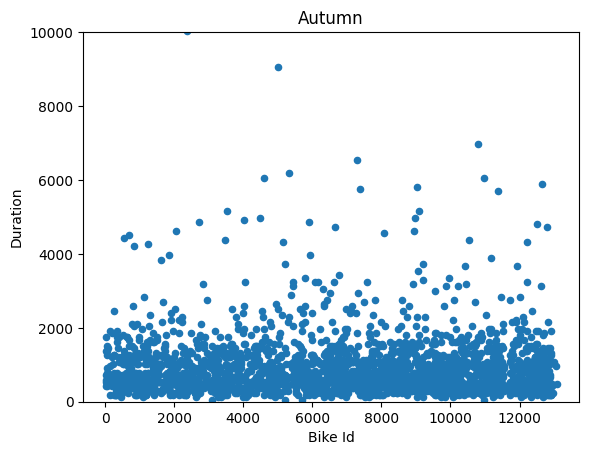

In [ ]:
pd_sample_autumn.plot(kind="scatter", y="Duration", x="Bike Id") 
plt.title("Autumn")
plt.ylim(0,10000)
plt.show()

In [ ]:
numexceed_autumn = pd_sample_autumn.query('Duration > 2000')
print(numexceed_autumn.count(),((numexceed_autumn.count())/2363)*100)

Bike Id       147
Duration      147
start Date    147
dtype: int64 Bike Id       6.220906
Duration      6.220906
start Date    6.220906
dtype: float64


In [ ]:
numexceed_autumn1 = pd_sample_autumn.query('Duration < 300')
print(numexceed_autumn1.count(),((numexceed_autumn1.count())/2363)*100)

Bike Id       186
Duration      186
start Date    186
dtype: int64 Bike Id       7.87135
Duration      7.87135
start Date    7.87135
dtype: float64


From the scatterplot of duration against BikeId it is evident that most of the duration has happened within 2000 for the autumn. This is only 147 records which is only 6.22 % of the data. The duration less than 300 is only 186 records which contributes to 7.8% of the data.

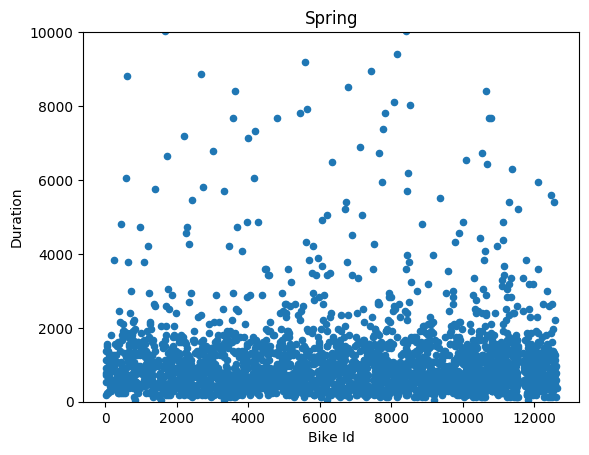

In [ ]:
pd_sample_spring.plot(kind="scatter", y="Duration", x="Bike Id") 
plt.title("Spring")
plt.ylim(0,10000)
plt.show()

In [ ]:
numexceed_spring = pd_sample_spring.query('Duration > 3000')
print(numexceed_spring.count(),((numexceed_spring.count())/2464)*100)

Bike Id       143
Duration      143
start Date    143
dtype: int64 Bike Id       5.803571
Duration      5.803571
start Date    5.803571
dtype: float64


In [ ]:
numexceed_spring1 = pd_sample_spring.query('Duration < 300')
print(numexceed_spring1.count(),((numexceed_spring1.count())/2464)*100)

Bike Id       194
Duration      194
start Date    194
dtype: int64 Bike Id       7.873377
Duration      7.873377
start Date    7.873377
dtype: float64


For the spring season there are more rides scattered between 2000 to 3000. Hence it can be said that most of the rides has happed within duration of 3000. This is only 143 records which contributes to 5.8% of the whole data. The records which are less than 300 is only 194 which is of 7.8 % contribution.

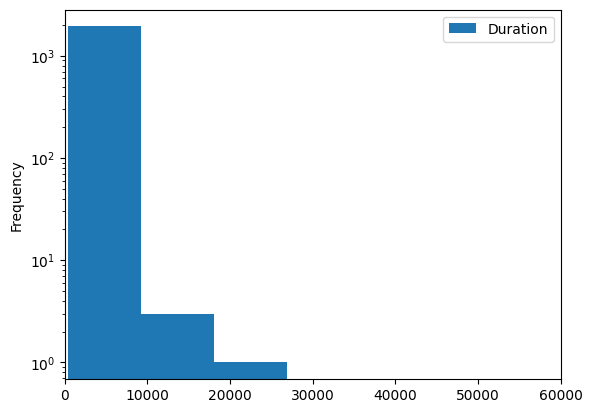

In [ ]:
#histogram with 100 bins and log of frequency for rides lasting more than 5 minutes
sample_autumn.filter("Duration > 300")[["Duration"]].toPandas().plot(kind="hist", bins=100, log=True)
plt.xlim(0,60000)
plt.show()

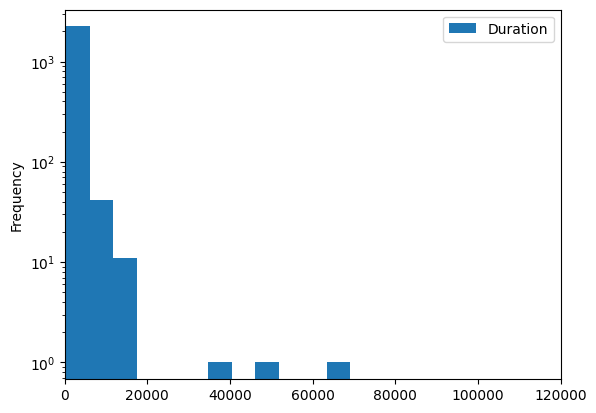

In [ ]:
#histogram with 100 bins and log of frequency for rides lasting more than 5 minutes
sample_spring.filter("Duration > 300")[["Duration"]].toPandas().plot(kind="hist", bins=100, log=True)
plt.xlim(0,120000)
plt.show()

In [ ]:
pd_autumn = autumn4.toPandas()
pd_spring = spring4.toPandas()

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


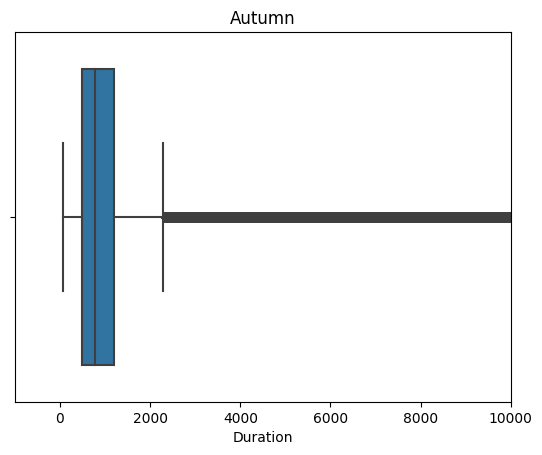

In [ ]:
#Lets check for the outliers in the Duration column for both the spring and autumn data
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = pd_autumn['Duration'])
plt.title('Autumn')
plt.xlim(-1000,10000)
plt.show()

From the boxplot of duration for autumn data the durations approximately above 2200 can be identified as outliers.

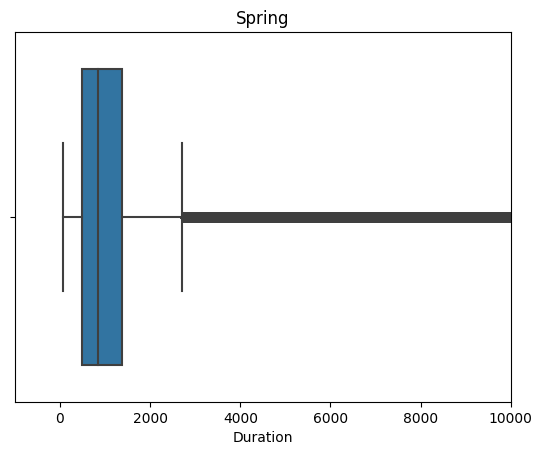

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = pd_spring['Duration'])
plt.title('Spring')
plt.xlim(-1000,10000)
plt.show()

The Duration above 2800 in the Spring can be considered as outliers.

In [ ]:
#Removing the outliers from the the autumn and the spring dataset
#For comparing the results of the data the duration range should be equal. Hence lets subset the sample in the range of 300 to 2500
#The rides below 5 minutes are also considered as outliers
autumn5 = autumn4.filter((col('Duration') <=2500) & (col('Duration') > 300))
spring5 = spring4.filter((col('Duration') <=2500) & (col('Duration') > 300))

In [ ]:
print(autumn5.count(), spring5.count())

1888393 2145344


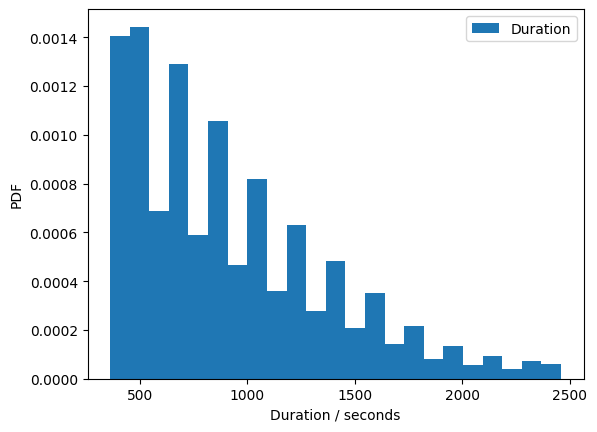

In [ ]:
autumn5.select("Duration").toPandas().plot(kind="hist", bins=23, density=True)
plt.xlabel("Duration / seconds")
plt.ylabel("PDF")
minY,maxY = plt.ylim()
plt.show()

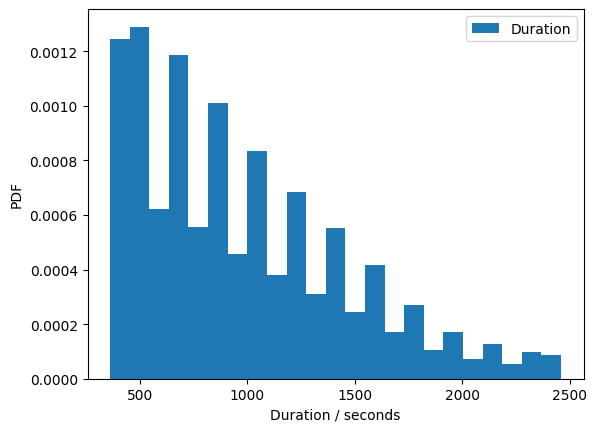

In [ ]:
spring5.select("Duration").toPandas().plot(kind="hist", bins=23, density=True)
plt.xlabel("Duration / seconds")
plt.ylabel("PDF")
minY,maxY = plt.ylim()
plt.show()

Both the spring and autumn data shows a decreasing trend for the increased dureation rides. But it can be noticed that the less duration rides for the autumn has more dentsity compared to that of the spring data.

## 5 MANUAL VALIDATION

Research Hypothesis: In 2014, people ride
for longer in Autumn than in Spring
<br>For this hypothesis to be true the methodology adopted for manual testing is the mean method.
<br>Mean(Autumn) > Mean(Spring) : Hypothesis is true
<br>Mean(Autumn) < Mean(Spring) : Hypothesis is False

In [ ]:
#Creating a new dataframe with duration
autumn_duration = autumn5.select(col('Duration'))
spring_duration = spring5.select(col('Duration'))

In [ ]:
autumn_duration.agg({"Duration": "mean"}).show()
spring_duration.agg({"Duration": "mean"}).show()

+----------------+
|   avg(Duration)|
+----------------+
|923.152479383264|
+----------------+

+-----------------+
|    avg(Duration)|
+-----------------+
|980.2048995405866|
+-----------------+



In [ ]:
autumn_duration.agg({"Duration": "sum"}).show()
spring_duration.agg({"Duration": "sum"}).show()

+-------------+
|sum(Duration)|
+-------------+
|   1743274680|
+-------------+

+-------------+
|sum(Duration)|
+-------------+
|   2102876700|
+-------------+



The Mean Duration of autumn is 923 and the mean duration of spring is 980.
<br>Mean(Autumn) < Mean(Spring)
<br>Hence the research hypothesis is proven False.
The sum of the duration also shows the duration for spring is greater than the duration for autumn

##6 HYPOTHESIS TESTING

The two sampled T test can be adopted here to test the hypothesis.

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_ind

In [ ]:
#Converting the dataframes to pandas dataframe
pd_autumn_duration = autumn_duration.toPandas()
pd_spring_duration = spring_duration.toPandas()

H₀: In 2014, people ride for longer in Autumn than in Spring.
<br>H₁: In 2014, people donot ride for longer in Autumn than in Spring.

In [ ]:
sample1= pd_autumn_duration.sample(1000, random_state=0)
sample2= pd_spring_duration.sample(1000, random_state=0)

In [ ]:
t_statistic, p_value = ttest_ind(sample1, sample2)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  [-2.14346665]
p-value:  [0.03219606]


alpha = 0.05
<br>Reject the null hypothesis if p-value <= alpha
<br>Fail to reject the null hypothesis if p-value > alpha

<br>p-value from the test = 0.03
<br>p-value < alpha
<br>Hence it rejects the null hypothesis. Which means in 2014, people donot ride for longer in Autumn than in Spring.